In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("data_banknote_authentication.txt", sep=",", header=None, names=["Variance of Wavelet Transformed image (continuous)", "Skewness of Wavelet Transformed image (continuous)", "Kurtosis of Wavelet Transformed image (continuous)", "Entropy of image (continuous)", "Class (target): Presumably 0 for genuine and 1 for forged"])
df

,Variance of Wavelet Transformed image (continuous),Skewness of Wavelet Transformed image (continuous),Kurtosis of Wavelet Transformed image (continuous),Entropy of image (continuous),Class (target): Presumably 0 for genuine and 1 for forged
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
#checking any null values in this dataset
df.isnull().sum()

Variance of Wavelet Transformed image (continuous)           0
Skewness of Wavelet Transformed image (continuous)           0
Kurtosis of Wavelet Transformed image (continuous)           0
Entropy of image (continuous)                                0
Class (target): Presumably 0 for genuine and 1 for forged    0
dtype: int64

In [4]:
#checking the Class(target) data
df['Class (target): Presumably 0 for genuine and 1 for forged'].value_counts()

0    762
1    610
Name: Class (target): Presumably 0 for genuine and 1 for forged, dtype: int64

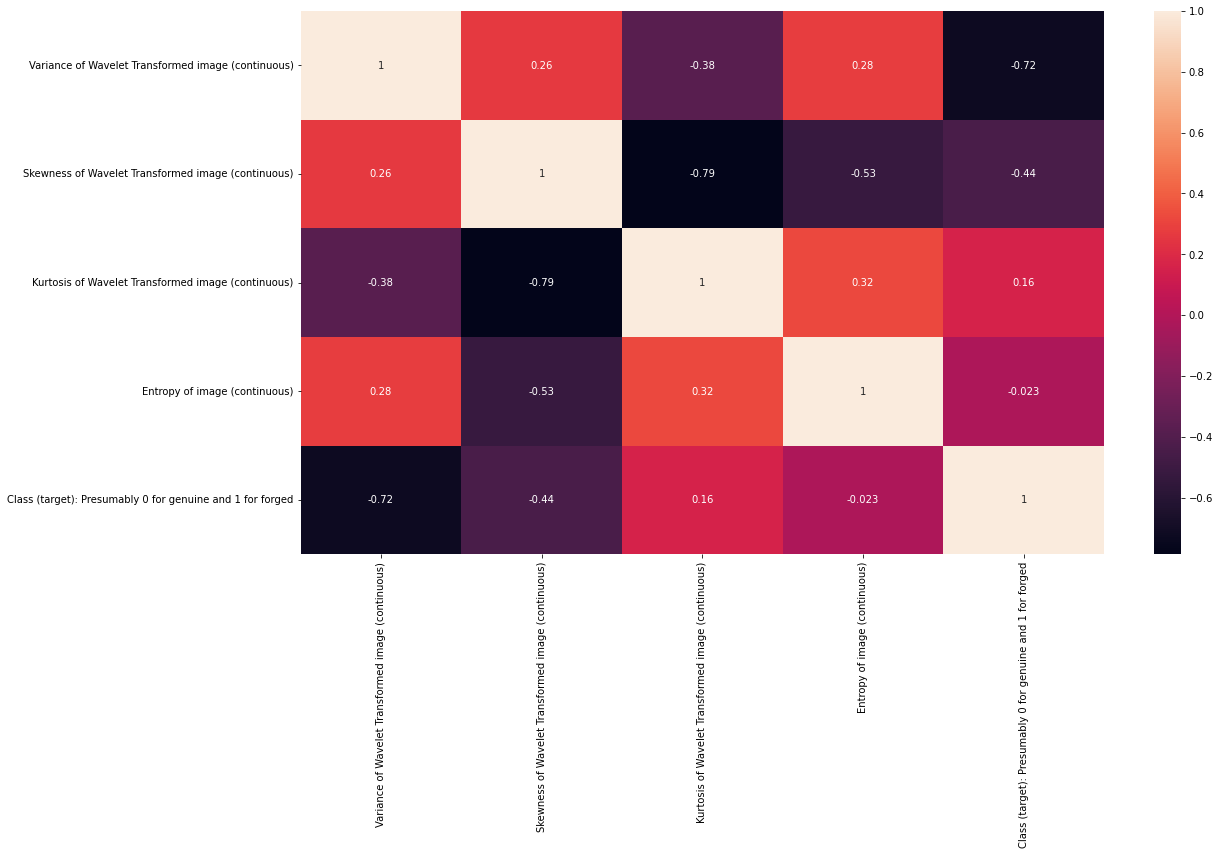

In [5]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, ax=ax);

Qns2:

In [6]:
#feature normalization
scaler = MinMaxScaler()
df.iloc[:, 0:-1]=scaler.fit_transform(df.iloc[:, 0:-1])
df

,Variance of Wavelet Transformed image (continuous),Skewness of Wavelet Transformed image (continuous),Kurtosis of Wavelet Transformed image (continuous),Entropy of image (continuous),Class (target): Presumably 0 for genuine and 1 for forged
0,0.769004,0.839643,0.106783,0.736628,0
1,0.835659,0.820982,0.121804,0.644326,0
2,0.786629,0.416648,0.310608,0.786951,0
3,0.757105,0.871699,0.054921,0.450440,0
4,0.531578,0.348662,0.424662,0.687362,0
...,...,...,...,...,...
1367,0.537124,0.565855,0.165249,0.726398,1
1368,0.407690,0.332868,0.506753,0.808350,1
1369,0.237385,0.011768,0.985603,0.524755,1
1370,0.250842,0.201701,0.761587,0.660675,1


Qns4:

In [7]:
#split the data
y = df['Class (target): Presumably 0 for genuine and 1 for forged']
X = df.drop('Class (target): Presumably 0 for genuine and 1 for forged',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 3)

Qns5:

In [8]:
clf = SGDClassifier(loss="log")
clf.fit(X_train, y_train)

SGDClassifier(loss='log')

In [9]:
#use default l2
grid = {
    'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3],
    'max_iter': [1000,2500,5000,7500,10000,12500,15000,17500,20000], 
    'learning_rate': ['constant','optimal','invscaling','adaptive'],
    'tol': [0.0001, 0.001, 0.01, 0.1],
    'eta0': [0.01]
    }

sgd_cv=GridSearchCV(clf,grid)
sgd_cv.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",sgd_cv.best_params_)
print("accuracy :",sgd_cv.best_score_)

tuned hyperparameters :(best parameters)  {'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'optimal', 'max_iter': 1000, 'tol': 0.0001}
accuracy : 0.9708333333333334


In [10]:
model = SGDClassifier(alpha = sgd_cv.best_params_['alpha'], eta0=0.01, loss ='log', learning_rate=sgd_cv.best_params_['learning_rate'], max_iter=sgd_cv.best_params_['max_iter'], tol=sgd_cv.best_params_['tol'])
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print("Confusion Matrix")
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Confusion Matrix
[[231   9]
 [  4 168]]


Qns6:

In [11]:
# Classification Report
print("\nClassification Report")
report = classification_report(y_test, y_pred)
print(report)


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       240
           1       0.95      0.98      0.96       172

    accuracy                           0.97       412
   macro avg       0.97      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412



Qns7:

In [12]:
grid1 = {
    'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3],
    'max_iter': [1000,2500,5000,7500,10000,12500,15000,17500,20000], 
    'learning_rate': ['constant','optimal','invscaling','adaptive'],
    'tol': [0.0001, 0.001, 0.01, 0.1],
    'eta0': [0.01],
    'penalty': ['l1', 'l2', 'elasticnet']
    }

sgd_cv1=GridSearchCV(clf,grid1)
sgd_cv1.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",sgd_cv1.best_params_)
print("accuracy :",sgd_cv1.best_score_)

tuned hyperparameters :(best parameters)  {'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'optimal', 'max_iter': 17500, 'penalty': 'l1', 'tol': 0.1}
accuracy : 0.9770833333333334


In [13]:
model1 = SGDClassifier(alpha = sgd_cv1.best_params_['alpha'], eta0=0.01, loss ='log', learning_rate=sgd_cv1.best_params_['learning_rate'], penalty=sgd_cv1.best_params_['penalty'], max_iter=sgd_cv1.best_params_['max_iter'], tol=sgd_cv1.best_params_['tol'])
model1.fit(X_train,y_train)

y_pred1 = model1.predict(X_test)
print("Confusion Matrix")
matrix = confusion_matrix(y_test, y_pred1)
print(matrix)

Confusion Matrix
[[233   7]
 [  0 172]]


Qns8:

In [14]:
# Classification Report
print("\nClassification Report")
report1 = classification_report(y_test, y_pred1)
print(report1)


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       240
           1       0.96      1.00      0.98       172

    accuracy                           0.98       412
   macro avg       0.98      0.99      0.98       412
weighted avg       0.98      0.98      0.98       412



Qns9:

In [15]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train,y_train)

y_pred_KNN = neigh.predict(X_test)
print("Confusion Matrix")
matrix = confusion_matrix(y_test, y_pred_KNN)
print(matrix)

Confusion Matrix
[[239   1]
 [  0 172]]


In [16]:
# Classification Report
print("\nClassification Report")
report = classification_report(y_test, y_pred_KNN)
print(report)


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       0.99      1.00      1.00       172

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



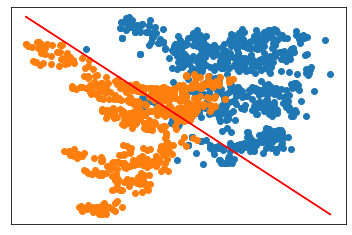

In [17]:
#raw data
from numpy import where
from matplotlib import pyplot

X_plot=X.to_numpy()
y_plot=y.to_numpy()
X_test_plot=X_test.to_numpy()
y_test_plot=y_test.to_numpy()


for class_value in range(2):
    # get row indexes for samples with this class
    row_ix =where (y_plot == class_value)
    # create scatter of these samples
    pyplot.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1])
    ident = [0.0, 1.0]
    ident1=[1.0,0.0]
    plt.plot(ident,ident1,"red")
    plt.xticks([])
    plt.yticks([])
# show the plot
pyplot.show()

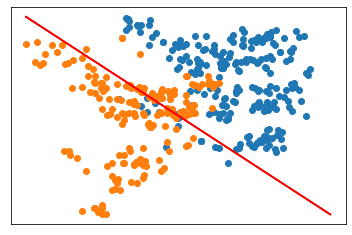

In [18]:
#logistics regression with penalty values
for class_value in range(4):
    # get row indexes for samples with this class
    row_ix =where (y_pred1 == class_value)
    # create scatter of these samples
    pyplot.scatter(X_test_plot[row_ix, 0], X_test_plot[row_ix, 1])
    ident = [0.0, 1.0]
    ident1=[1.0,0.0]
    plt.plot(ident,ident1,"red")
    plt.xticks([])
    plt.yticks([])
# show the plot
pyplot.show()

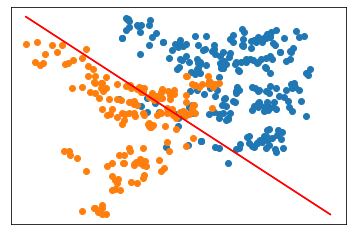

In [19]:
#KNN
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix =where (y_pred_KNN == class_value)
    # create scatter of these samples
    pyplot.scatter(X_test_plot[row_ix, 0], X_test_plot[row_ix, 1])
    ident = [0.0, 1.0]
    ident1=[1.0,0.0]
    plt.plot(ident,ident1,"red")
    plt.xticks([])
    plt.yticks([])
# show the plot
pyplot.show()